# Определение эффективного радиуса теплоснабжения

**Эффективный радиус теплоснабжения** - расстояние от теплопотребляющей установки до источника тепловой энергии, при превышении которого подключение теплопотребляющей установки нецелесообразно по причине увеличения совокупных расходов в системе теплоснабжения.

<div>
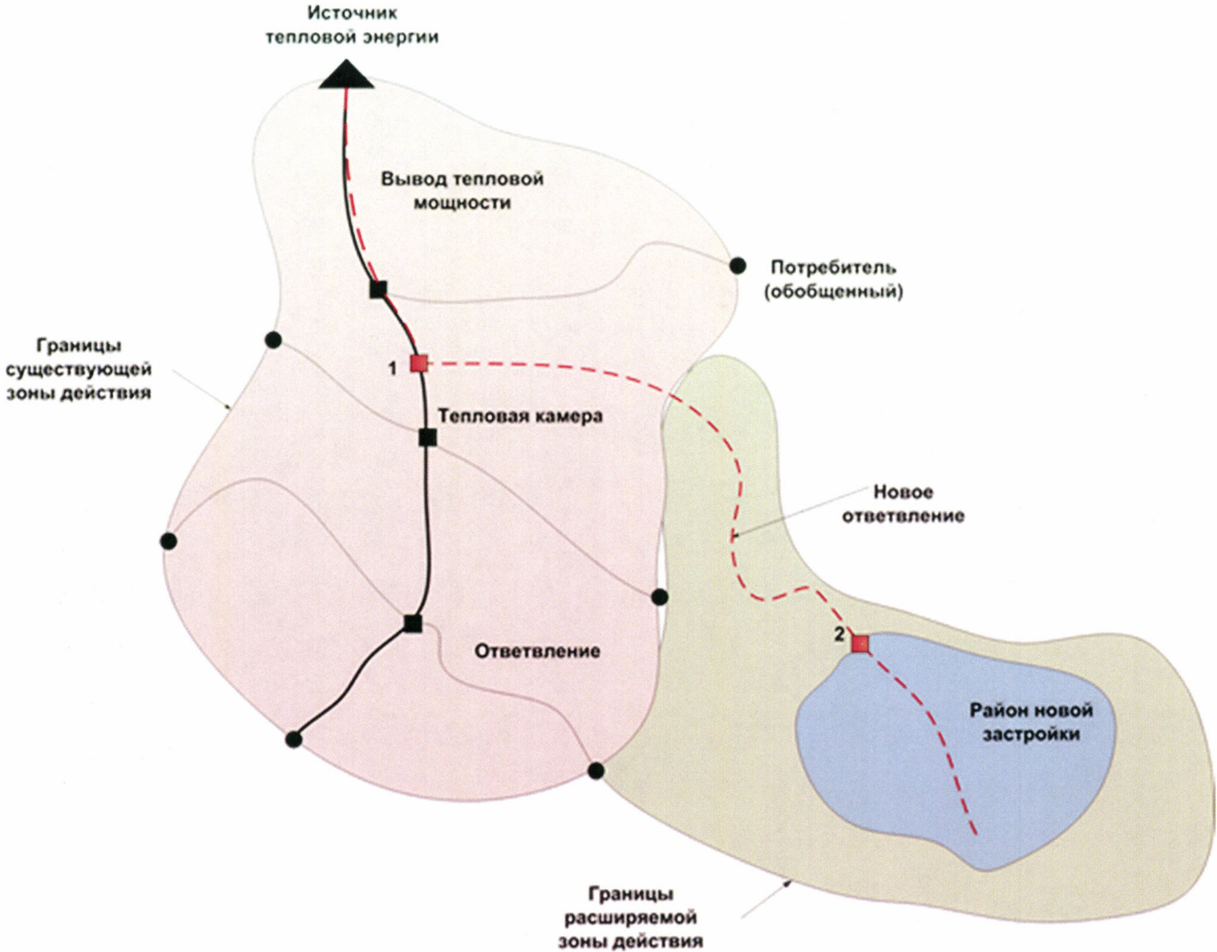
</div>

### Описание проблемы
Допустим, что в некотором городе появился район новой застройки, находящийся на значительном расстоянии от существующих тепловых сетей. Для того, чтобы его подключить к тепловым сетям нужно:
- постороить новую тепловую сеть ("новое ответвление" на рисунке);
- построить внутриквартальные сети в районе новой застройки

Чем дальше потребитель расположен от точки подключения, тем дороже его подключить. Также уменьшается эффективность работы тепловых сетей из-за увеличения тепловых потерь и расхода электроэнергии на перекачку сетевой воды.

Исходя из сказанного выше становится актуальной проблема определения эффективного радиуса теплоснабжения - то есть расстояния, в пределах которого подключение новых потребителей было бы экономически целесообразным.

Если район новой застройки находится за пределами эффективного радиуса теплоснабжения, то для обеспечения его тепловой энергией принимается решение о строительстве нового источника теплоты - обычно, котельной.

### Идея проекта
- определить стомость строительства тепловых сетей для подлкючения нового района строительства;
- определить срок окупаемости подключения;
- определить эффективный радиус теплоснабжения

### Математическое обоснование зависимости эффективного радиуса теплоснабжения от простого срока окупаемости
Простой срок окупаемости ($PP$) равен:
$$PP = \frac{IC}{CF}$$
- $IC$ – сумма инвестиций в проект;
- $CF$ – планируемая ежегодная прибыль

Сумма инвестиций в проект ($IC$) равна:
$$IC = ЦС_{вн.кв.} + ЦС^{уд}_{отв.}L_{отв.}$$
- $ЦС_{вн.кв.}$ – цена строительства внутриквартальных тепловых сетей, тыс. руб.;
- $ЦС^{уд}_{отв.}$ – удельная цена строительства нового ответвления, тыс. руб./м;
- $L_{отв.}$ – длина нового ответвления, м

Планируемая ежегодная прибыль ($CF$) равна:
$$CF = Q^{год}_{сумм}T^{тэ}_{потр.} - (Q^{год}_{сумм}+\Delta Q_{вн.кв.}+8400\Delta q_{отв.}L_{отв.})Т^{тэ}_{ист.}$$
- $Q^{год}_{сумм}$ – годовое потребление тепловой энергии потребителями, Гкал;
- $T^{тэ}_{потр.}$ – тариф на тепловую энергию в горячей воде, поставляемую АО «Сибирская энергетическая компания» потребителям города Новосибирска, 1505,98 руб./Гкал (с учетом НДС);
- $\Delta Q_{вн.кв.}$ – годовые тепловые потери во внутриквартальных тепловых сетях, Гкал;
- $8400$ – нормативная продолжительность работы тепловых сетей в год, ч;
- $\Delta q_{отв.}$ – удельные тепловые потери трубопровода нового ответвления, $\frac{Гкал/ч}{м}$;
- $Т^{тэ}_{ист.тэ.}$ – тариф на тепловую энергию на коллекторах источников тепловой энергии АО «Сибирская энергетическая компания», производимую в режиме комбинированной выработки электрической и тепловой энергии, 568,62 руб./Гкал (с учетом НДС)
Тогда
$$PP = \frac{ЦС_{вн.кв.} + ЦС^{уд}_{отв.}L_{отв.}}{Q^{год}_{сумм}T^{тэ}_{потр.} - (Q^{год}_{сумм}+\Delta Q_{вн.кв.}+8400\Delta q_{отв.}L_{отв.})Т^{тэ}_{ист.}}$$

Значения тарифов на тепловую энергию, использованные в расчетах, приняты на основании Приказов Департамента по тарифам Новосибирской области №511-ТЭ от 16.12.2021 г. и №514-ТЭ от 16.12.2021 г.

Источник: https://tarif.nso.ru/page/496

In [1]:
T_ABONENTS = 1505.98
T_SOURCE = 568.62

Выразим длину нового ответвления:
$$L_{отв.} = \frac{Q^{год}_{сумм}T^{тэ}_{потр.}PP - Q^{год}_{сумм}Т^{тэ}_{ист.}PP-\Delta Q_{вн.кв.}Т^{тэ}_{ист.}PP - ЦС_{вн.кв.}}{ЦС^{уд}_{отв.}+8400\Delta q_{отв.}Т^{тэ}_{ист.}PP}$$

Значение $L_{отв.}$ соответствует искомому эффективному радиусу теплоснабжения.

Для решения поставленной задачи определим значения $ЦС_{вн.кв.}$ и $\Delta Q_{вн.кв.}$ с помощью классических методов машинного обучения.

## Исходные данные

### Импорт необходимых библиотек

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Участки тепловых сетей и потребители тепловой энергии

Данные по участкам тепловых сетей и потребителям тепловой энергии взяты из электронной модели теплоснабжения города

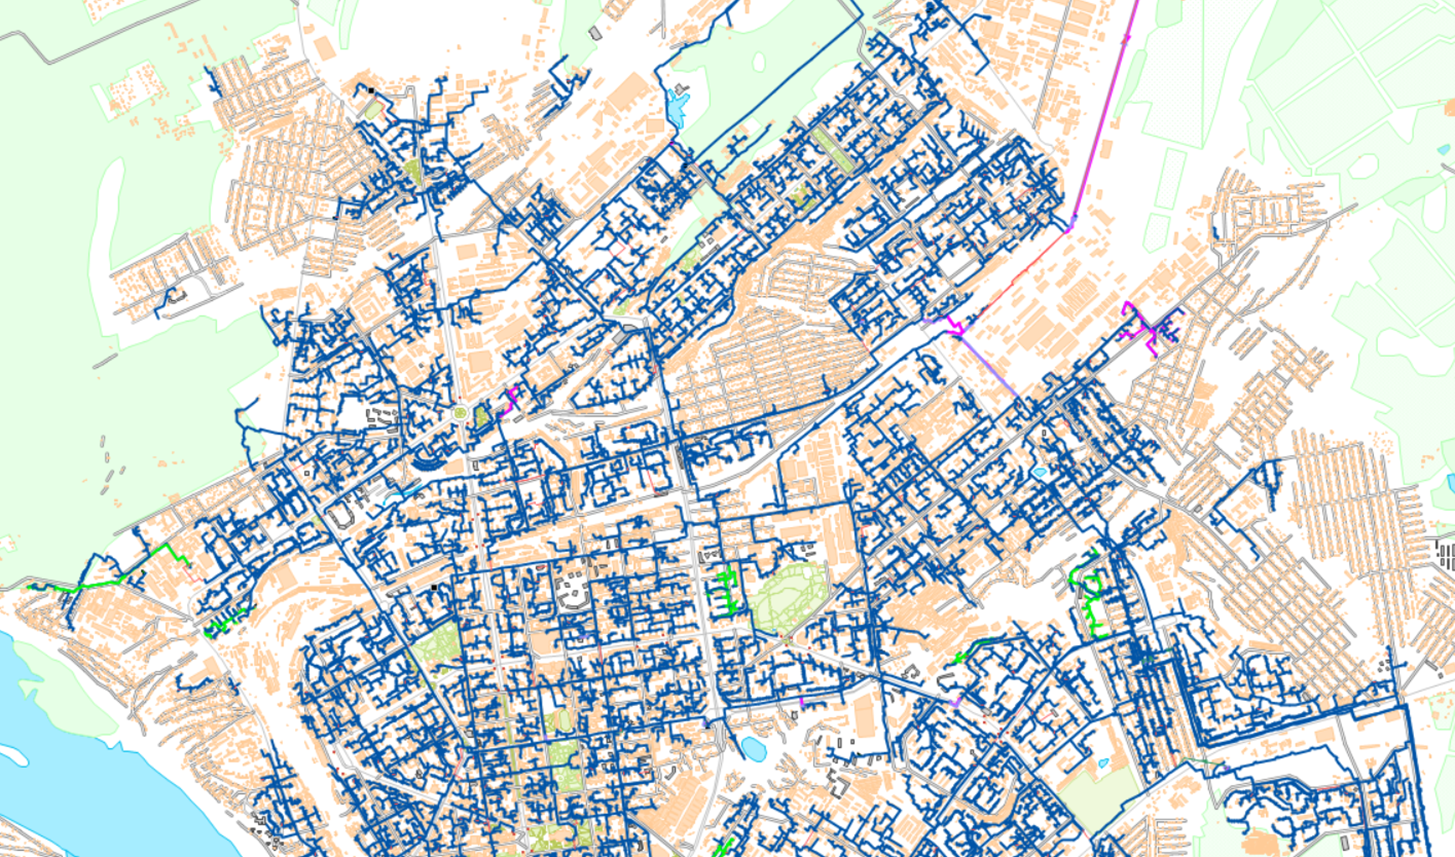

In [3]:
# Участки тепловых сетей
heat_net = pd.read_excel('data/heating_networks.xls', index_col=0, header=0)
heat_net.index.name = None

heat_net

Номер источника Наименование начала участка  \
2954                  5                   ЦТП-ж1/68   
2956                  5                   ЦТП-ж1/68   
2960                  5                         т.6   
2962                  5                   ТК-1/68-3   
2963                  5                         т.2   
...                 ...                         ...   
107244               55                         NaN   
107371               55                     ТК-1037   
107373               55                         УТ1   
130717               55                         УТ1   
130827               55                     ТК-20-8   

                         Наименование конца участка       Кадастр  \
2954                                      ЦТП-ж1/68  54:35:021070   
2956                                      ТК-1/68-2  54:35:021070   
2960                                Жилой дом, ТУ-1  54:35:021070   
2962                                            т.2  54:35:021070   
2963                                            т.3  54:35:021070   
...                                             ...           ...   
107244                                   Автосервис  54:35:051151   
107371                                          УТ1  54:35:051135   
107373                                    Жилой дом  54:35:051135   
130717  Жилой дом, 2ГП - жилая часть, ПОН - 2017 г.  54:35:051135   
130827                    Магазин смешанных товаров  54:35:051905   

        Длина участка, м  Внутpенний диаметp подающего тpубопpовода, м  \
2954                6.79                                         0.259   
2956               17.34                                         0.150   
2960                3.00                                         0.069   
2962               27.14                                         0.150   
2963               22.14                                         0.150   
...                  ...                                           ...   
107244             95.49                                         0.150   
107371            302.40                                         0.125   
107373             20.20                                         0.050   
130717             50.10                                         0.069   
130827             56.00                                         0.040   

        Внутренний диаметр обратного трубопровода, м  \
2954                                           0.259   
2956                                           0.150   
2960                                           0.069   
2962                                           0.150   
2963                                           0.150   
...                                              ...   
107244                                         0.150   
107371                                         0.125   
107373                                         0.050   
130717                                         0.069   
130827                                         0.040   

       Вид прокладки тепловой сети Нормативные потери в тепловой сети (1-4)  \
2954                    Подвальная                                 1959 год   
2956           Подземная канальная                                 1959 год   
2960                    Подвальная                                 1959 год   
2962           Подземная канальная                                 1959 год   
2963           Подземная канальная                                 1959 год   
...                            ...                                      ...   
107244                  Подвальная                                      NaN   
107371         Подземная канальная                                 2003 год   
107373         Подземная канальная                                 2003 год   
130717         Подземная канальная                                 2003 год   
130827         Подземная канальная                                 2003 год   

       

In [4]:
# Потребители тепловой энергии
abonents = pd.read_excel('data/existing_abonents.xls', 
                         index_col=0, 
                         header=0)
abonents.index.name = None

abonents

Кадастровый номер Признак потребителя        ЦТП  \
2959        54:35:021070                  ЖФ  ЦТП-ж1/68   
2968        54:35:021070                  ЖФ  ЦТП-ж1/68   
2971        54:35:021070                  ЖФ  ЦТП-ж1/68   
2973        54:35:021070                  ЖФ  ЦТП-ж1/68   
2975        54:35:021070                  ЖФ  ЦТП-ж1/68   
...                  ...                 ...        ...   
131012      54:35:053585                  ЖФ        NaN   
131015      54:35:053585                  ЖФ        NaN   
131019      54:35:053575                  ЖФ        NaN   
131026      54:35:053575                  ЖФ        NaN   
131028      54:35:053575                  ЖФ        NaN   

              Адрес узла ввода Наименование узла  Номер источника  \
2959         ул. 1905 года, 30   Жилой дом, ТУ-1                5   
2968         ул. 1905 года, 30   Жилой дом, ТУ-5                5   
2971         ул. 1905 года, 30   Жилой дом, ТУ-4                5   
2973         ул. 1905 года, 30   Жилой дом, ТУ-3                5   
2975         ул. 1905 года, 30   Жилой дом, ТУ-2                5   
...                        ...               ...              ...   
131012  ул. Дмитрия Шмонина, 4         Жилой дом                3   
131015  ул. Дмитрия Шмонина, 6         Жилой дом                3   
131019        ул. Петухова, 95         Жилой дом                3   
131026        ул. Петухова, 97         Жилой дом                3   
131028        ул. Петухова, 95         Жилой дом                3   

        Высота здания потpебителя, м  Номер схемы подключения потребителя  \
2959                            27.0                                    2   
2968                            27.0                                    2   
2971                            27.0                                    2   
2973                            27.0                                    2   
2975                            27.0                                    2   
...                              ...                                  ...   
131012                          30.0                                   17   
131015                          30.0                                   17   
131019                          36.0                                   14   
131026                          36.0                                   14   
131028                          36.0                                   14   

        Расчетная темп. сет. воды на входе в потреб.,°C  \
2959                                                150   
2968                                                150   
2971                                                150   
2973                                                150   
2975                                                150   
...                                                 ...   
131012                                              150   
131015                                              150   
131019                                              150   
131026                                              150   
131028                                              150   

        Расчетная нагрузка на отопление, Гкал/ч  ...  \
2959                                     0.1730  ...   
2968                                     0.1731  ...   
2971                                     0.1510  ...   
2973                                     0.1510  ...   
2975                                     0.1510  ...   
...                                         ...  ...   
131012                                   0.5792  ...   
131015                                   0.5792  ...   
131019                                   0.8655  ...   
131026                                   0.8375  ...   
131028                                   0.8646  ...   

        Располагаемый напоp на вводе потpебителя, м  \
2959                                          12.10   
2968                                          12.19 

### Кадастровые кварталы

Данные по кадастровым кварталам (кадастровый номер и площадь) взяты из публичной кадастровой карты

источник: https://pkk.rosreestr.ru/

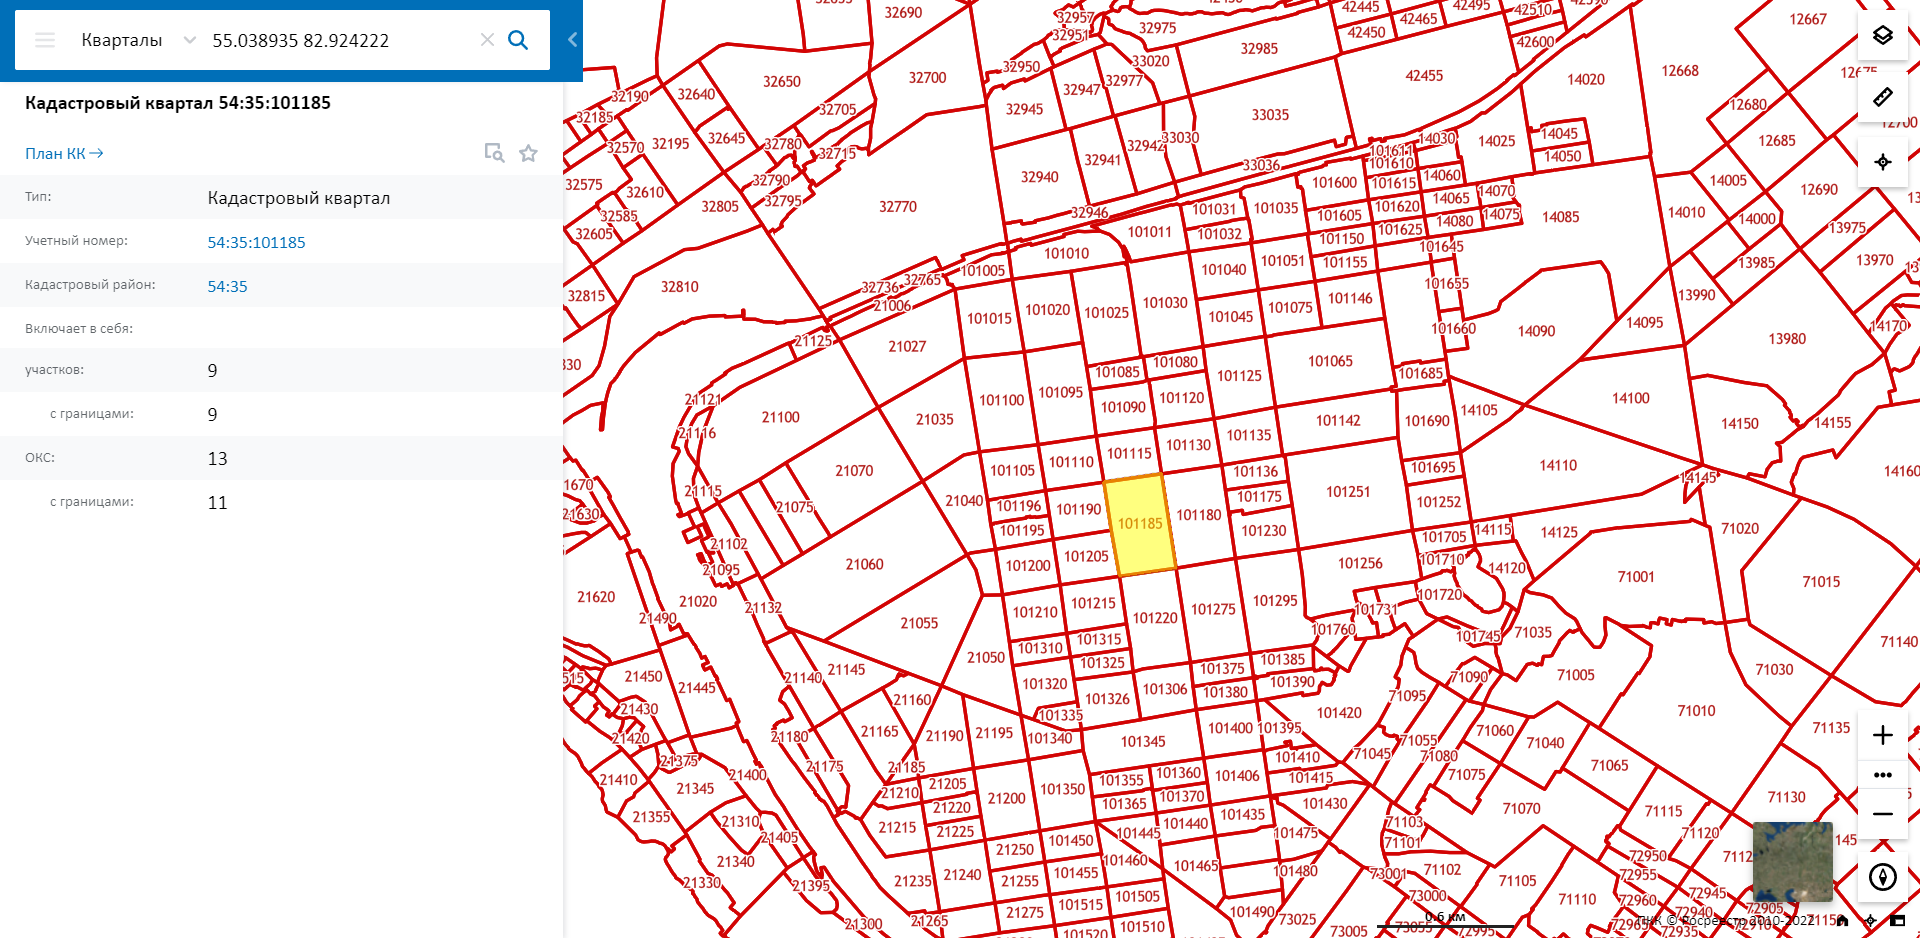

In [5]:
# Кадастровые кварталы
cadastre = pd.read_excel('data/cadastre.xls', index_col=0, header=0)
cadastre.index.name = None

cadastre

ID  Статус            КН   Zysnom  \
48                                4277       5  54:35:051191  51191.0   
3760  {C1564A62-9D50-11D5-92B8-0090278       5  54:35:074336  74336.0   
3644                              4499       5  54:35:061055  61055.0   
1616                              1057       5  54:35:012516  12516.0   
2656                              4068       5  54:35:091861  91861.0   
...                                ...     ...           ...      ...   
3558                              4428       5  54:35:052045  52045.0   
3804                               439       8  54:35:073700  73700.0   
4109                               650       5  54:35:011735  11735.0   
31                                4427       0  54:35:051010  51010.0   
3543                              2500       5  54:35:053110  53110.0   

                                                  notes  \
48    секция поделена полосой отвода ж/д, часть деж....   
3760                                      ранее 07 4335   
3644  при делении квартала 61055 образовано два квар...   
1616                получена путум деления секции 12515   
2656              образована путем деления секции 91860   
...                                                 ...   
3558                                                NaN   
3804                                                NaN   
4109                                                NaN   
31                                                  NaN   
3543                                                NaN   

                                            description  Zys_sec       Площадь  
48                                                  NaN    51191  145259.80990  
3760                                                NaN    74336   26936.61175  
3644                                                NaN    61055  709550.18625  
1616  Квартал ограничен ул. Лазарева, ул. Трикотажна...    12516   18645.51325  
2656  Северная граница квартала проходит по ул.Часов...    91861   70774.49230  
...                                                 ...      ...           ...  
3558  южная граница квартала совпадает с кварталом 5...    52045  504090.89915  
3804                                                NaN    73700   13271.60130  
4109  южная граница квартала совпадает с линией заст...    11735    4073.56425  
31    южная граница квартала совпадает с полосой отв...    51010  201491.55845  
3543  южная и часть юго-восточной границ квартала пр...    53110   64912.49015  

[4701 rows x 8 columns]

### Нормативы цены строительства

В данной работе были использованы укрупненные нормативы цены строительства, утвержденные приказом Министерства строительства и жилищно-коммунального хозяйства Российской Федерации №916/пр от 30 декабря 2019 г.

In [6]:
# Нормативы цены строительства
price = pd.read_excel('data/нормативы цены строительства.xls', 
                      index_col=0, 
                      header=0)
price.index.name = None

price

DN Тип прокладки     Тепловая изоляция  \
1    32  бесканальная  пенополиуретан (ППУ)   
2    40  бесканальная  пенополиуретан (ППУ)   
3    50  бесканальная  пенополиуретан (ППУ)   
4    65  бесканальная  пенополиуретан (ППУ)   
5    80  бесканальная  пенополиуретан (ППУ)   
6   100  бесканальная  пенополиуретан (ППУ)   
7   125  бесканальная  пенополиуретан (ППУ)   
8   150  бесканальная  пенополиуретан (ППУ)   
9   200  бесканальная  пенополиуретан (ППУ)   
10  250  бесканальная  пенополиуретан (ППУ)   
11  300  бесканальная  пенополиуретан (ППУ)   
12  400  бесканальная  пенополиуретан (ППУ)   
13  500  бесканальная  пенополиуретан (ППУ)   
14  600  бесканальная  пенополиуретан (ППУ)   

   Технические характеристики конструктивных решений и видов работ  \
1   на песчаном основании, в сухих грунтах в транш...                
2   на песчаном основании, в сухих грунтах в транш...                
3   на песчаном основании, в сухих грунтах в транш...                
4   на песчаном основании, в сухих грунтах в транш...                
5   на песчаном основании, в сухих грунтах в транш...                
6   на песчаном основании, в сухих грунтах в транш...                
7   на песчаном основании, в сухих грунтах в транш...                
8   на песчаном основании, в сухих грунтах в транш...                
9   на песчаном основании, в сухих грунтах в транш...                
10  на песчаном основании, в сухих грунтах в транш...                
11  на песчаном основании, в сухих грунтах в транш...                
12  на песчаном основании, в сухих грунтах в транш...                
13  на песчаном основании, в сухих грунтах в транш...                
14  на песчаном основании, в сухих грунтах в транш...                

    Норматив цены строительства на 01.01.2020, тыс.руб./м Код показателя  \
1                                                 NaN                NaN   
2                                                 NaN                NaN   
3                                              7.3216       13-07-001-01   
4                                              8.1113       13-07-001-02   
5                                              8.4095       13-07-001-03   
6                                              9.4795       13-07-001-04   
7                                             11.7483       13-07-001-05   
8                                             12.4101       13-07-001-06   
9                                             19.0256       13-07-001-07   
10                                            26.9014       13-07-001-08   
11                                            28.4504       13-07-001-09   
12                                            40.3552       13-07-001-10   
13                                            64.2641       13-07-001-11   
14                                            70.2327       13-07-001-12   

                                                  НТД  
1                                                 NaN  
2                                                 NaN  
3   НЦС 81-02-13-2020 Сборник № 13. Наружные тепло...  
4   НЦС 81-02-13-2020 Сборник № 13. Наружные тепло...  
5   НЦС 81-02-13-2020 Сборник № 13. Наружные тепло...  
6   НЦС 81-02-13-2020 Сборник № 13. Наружные тепло...  
7   НЦС 81-02-13-2020 Сборник № 13. Наружные тепло...  
8   НЦС 81-02-13-2020 Сборник № 13. Наружные тепло...  
9   НЦС 81-02-13-2020 Сборник № 13. Наружные тепло...  
10  НЦС 81-02-13-2020 Сборник № 13. Наружные тепло...  
11  НЦС 81-02-13-2020 Сборник № 13. Наружные тепло...  
12  НЦС 81-02-13-2020 Сборник № 13. Наружные тепло...  
13  НЦС 81-02-13-2020 Сборник № 13. Наружные тепло...  
14  НЦС 81-02-13-2020 Сборник № 13. Наружные тепло...

### Нормативы тепловых потерь

In [7]:
# Нормативы тепловых потерь
heat_losses = pd.read_excel('data/нормативы тепловых потерь.xls', header=0)

heat_losses

Разность температур теплоносителя и грунта, °С     25     32     40  \
0                                              57.5  23.00  25.00  27.00   
1                                              57.6  23.04  25.04  27.04   
2                                              57.7  23.08  25.08  27.08   
3                                              57.8  23.12  25.12  27.12   
4                                              57.9  23.16  25.16  27.16   
..                                              ...    ...    ...    ...   
221                                            79.6  30.88  33.84  35.84   
222                                            79.7  30.91  33.88  35.88   
223                                            79.8  30.94  33.92  35.92   
224                                            79.9  30.97  33.96  35.96   
225                                            80.0  31.00  34.00  36.00   

        50      65      80     100     125     150  ...     400      450  \
0    30.00  35.000  39.000  42.000  48.000  54.000  ...  112.00  122.000   
1    30.04  35.056  39.048  42.064  48.072  54.072  ...  112.12  122.136   
2    30.08  35.112  39.096  42.128  48.144  54.144  ...  112.24  122.272   
3    30.12  35.168  39.144  42.192  48.216  54.216  ...  112.36  122.408   
4    30.16  35.224  39.192  42.256  48.288  54.288  ...  112.48  122.544   
..     ...     ...     ...     ...     ...     ...  ...     ...      ...   
221  39.80  45.840  50.760  56.720  62.760  70.680  ...  139.48  151.480   
222  39.85  45.880  50.820  56.790  62.820  70.760  ...  139.61  151.610   
223  39.90  45.920  50.880  56.860  62.880  70.840  ...  139.74  151.740   
224  39.95  45.960  50.940  56.930  62.940  70.920  ...  139.87  151.870   
225  40.00  46.000  51.000  57.000  63.000  71.000  ...  140.00  152.000   

         500      600      700      800      900     1000     1200     1400  
0    134.000  154.000  173.000  194.000  215.000  237.000  280.000  323.000  
1    134.136  154.176  173.192  194.216  215.232  237.248  280.288  323.344  
2    134.272  154.352  173.384  194.432  215.464  237.496  280.576  323.688  
3    134.408  154.528  173.576  194.648  215.696  237.744  280.864  324.032  
4    134.544  154.704  173.768  194.864  215.928  237.992  281.152  324.376  
..       ...      ...      ...      ...      ...      ...      ...      ...  
221  166.360  191.360  213.320  239.240  264.160  290.080  340.960  394.800  
222  166.520  191.520  213.490  239.430  264.370  290.310  341.220  395.100  
223  166.680  191.680  213.660  239.620  264.580  290.540  341.480  395.400  
224  166.840  191.840  213.830  239.810  264.790  290.770  341.740  395.700  
225  167.000  192.000  214.000  240.000  265.000  291.000  342.000  396.000  

[226 rows x 24 columns]

### Перспективные площадки строительства

Данные по перспективным площадкам строительства, также как и данные по участкам тепловых сетей и потребителям тепловой энергии, взяты из электронной модели теплоснабжения города

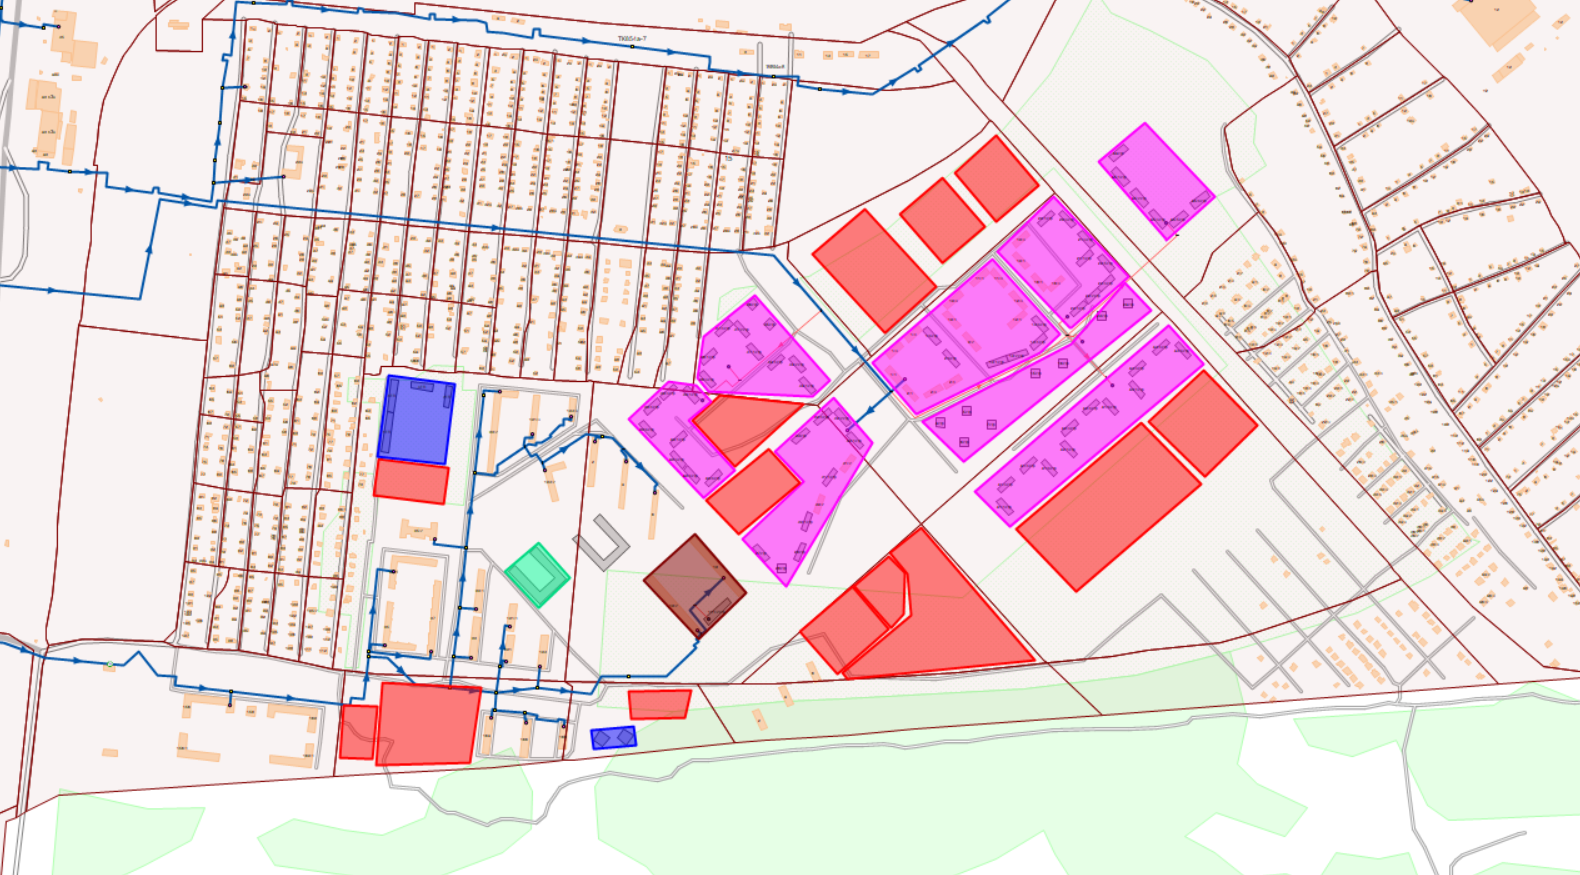

In [8]:
# Перспективные площадки строительства
perspective_area = pd.read_excel('data/perspective_area.xls', header=0)

perspective_area

Sys  Номер площадки           Наименование_орг             Улица  \
0      22              22                 ООО "БРИК"         Журинская   
1      44              44               ООО "Эталон"    Большевистская   
2      72              72               ООО "Уникон"      Горский, мкр   
3      99              99  ЖСК "Дом на Сибирской-35"         Сибирская   
4     121             121         ООО "Левобережное"  Карла Маркса, пл   
..    ...             ...                        ...               ...   
489  3616            3616                  ООО "КМС"    25 лет Октября   
490  3617            3617         ООО "Терра Инвест"       Объединения   
491  3618            3618              ООО "Апшерон"         Толбухина   
492  3622            3622                      ППиМТ          Аэропорт   
493  3623            3623             ООО "НотусКар"       Станционная   

          Дом                 Объект  Номер_вх_заявки        Дата  \
0          37            жилое с ПОН          81401.0  26.11.2015   
1      14 стр                    МФК          83109.0  23.05.2016   
2      12 стр            жилое с ПОН          90884.0  20.06.2017   
3        35/1            жилое с ПОН          90999.0  28.07.2017   
4         6/1  общественный комплекс          87688.0  29.09.2016   
..        ...                    ...              ...         ...   
489  1ГП, 2ГП                  жилое          92684.0  06.12.2017   
490       NaN            техническое          90934.0  25.07.2017   
491   41а стр            автостоянка          92013.0  17.10.2017   
492       NaN       административное              NaN         NaN   
493       NaN    магазин автомобилей          92522.0  24.11.2017   

     Номер_вх_заявки2 Номер_вх_заявки3  ...  Этажность  \
0             75914.0            71616  ...         30   
1             81288.0            79775  ...         15   
2             79907.0            77835  ...         24   
3             80269.0            74726  ...          9   
4             87351.0            80710  ...          3   
..                ...              ...  ...        ...   
489               NaN              NaN  ...         19   
490               NaN              NaN  ...          0   
491           91034.0              NaN  ...          1   
492               NaN              NaN  ...          0   
493               NaN              NaN  ...          1   

          Кадастровый номер         Примечание  Планируемый срок ввода  \
0           54:35:101275:93  актуализация 2019                    2019   
1           54:35:074455:68  актуализация 2019                    2019   
2    54:35:064335:2, 13, 24  актуализация 2019                    2017   
3          54:35:021060:146  актуализация 2019                    2017   
4           54:35:064240:24  актуализация 2019                    2018   
..                      ...                ...                     ...   
489        54:35:041930:902  актуализация 2019               2020-2021   
490            54:35:041285  актуализация 2019               2020-2021   
491       54:35:014920:2301  актуализация 2019                    2020   
492            54:35:033735  актуализация 2019                    2021   
493         54:35:062330:54  актуализация 2019               2018-2019   

     Площадь "ЖФ"_м2 Площадь "ОДЗ"_м2 Площадь "П"_м2 Площадь кадастра _м2  \
0            15737.0           1460.0            NaN            673.29615   
1                NaN          93212.0            NaN          15759.36470   
2             9136.0            842.0            NaN           1532.11815   
3             6350.0            480.0            NaN           1081.23685   
4                NaN          19150.0            NaN          12433.31375   
..               ...              ...            ...                  ...   
489          23996.0              NaN            NaN           4197.01815   
490              NaN              NaN        37540.0          40316.98220   
491      

In [9]:
perspective_abonents = pd.read_excel('data/perspective_abonents.xlsx', header=0)

perspective_abonents

ID № входящего                 Дата  \
0     3084       91129  2017-08-10 00:00:00   
1     3084       91129  2017-08-10 00:00:00   
2     3085       91132  2017-08-10 00:00:00   
3     3087       91131  2017-08-10 00:00:00   
4     3087       91131  2017-08-10 00:00:00   
...    ...         ...                  ...   
999   3618       92013  2017-10-17 00:00:00   
1000  3618       83133  2016-05-24 00:00:00   
1001  3622         NaN                  NaN   
1002  3623       92522  2017-11-24 00:00:00   
1003  3623       92522  2017-11-24 00:00:00   

                              Наименование потребителя Этажность  \
0                     Ж/к "RED FOX", 2ГП - жилая часть        14   
1                             Ж/к "RED FOX", 2ГП - ПОН       NaN   
2                                   Ж/к "RED FOX", 4ГП        14   
3                     Ж/к "RED FOX", 1ГП - жилая часть        14   
4                             Ж/к "RED FOX", 1ГП - ПОН       NaN   
...                                                ...       ...   
999                                        Автостоянка         1   
1000  Общественное здание административного назначения         5   
1001                             Ледовый дворец спорта       NaN   
1002                   Магазин автомобилей - 1 очередь         1   
1003                   Магазин автомобилей - 1 очередь         1   

     Признак потребителя        Адресная привязка         Район  \
0                     ЖФ           ул. Коминтерна   Дзержинский   
1                    ОДЗ           ул. Коминтерна   Дзержинский   
2                     ЖФ           ул. Коминтерна   Дзержинский   
3                     ЖФ           ул. Коминтерна   Дзержинский   
4                    ОДЗ           ул. Коминтерна   Дзержинский   
...                  ...                      ...           ...   
999                  ОДЗ   ул. Толбухина, 41а стр    Дзежинский   
1000                 ОДЗ  ул. Кошурникова, 33 стр   Дзержинский   
1001                 ОДЗ      Аэропорт "Северный"  Заельцовский   
1002                 ОДЗ          ул. Станционная     Ленинский   
1003                 ОДЗ          ул. Станционная     Ленинский   

     Кадастровый квартал номер земельного участка  ...  \
0           54:35:014805                      374  ...   
1           54:35:014805                      374  ...   
2           54:35:014805                      374  ...   
3           54:35:014610                      118  ...   
4           54:35:014610                      118  ...   
...                  ...                      ...  ...   
999         54:35:014920                     2301  ...   
1000        54:35:014160                   12, 47  ...   
1001        54:35:033735                      NaN  ...   
1002        54:35:062330                       54  ...   
1003        54:35:062330                       54  ...   

      Сумма при среднем ГВС, Гкал/ч  Нагрузка на ГВС максимальная, Гкал/ч  \
0                          0.381486                                0.2712   
1                          0.040180                                0.0384   
2                          0.407586                                0.2838   
3                          0.381486                                0.2712   
4                          0.040180                                0.0384   
...                             ...                                   ...   
999                        0.179234                                0.0000   
1000                       0.837300                                0.1850   
1001                       5.826160                                1.0028   
1002                       0.169000                                0.0000   
1003                       0.097000                                0.0000   

      Сумма при максимальном ГВС, Гкал/ч  \
0                               0.575200   
1                               0.070900   
2                               0.610300   
3                      

## Предобработка данных

### Предобработка данных, участки тепловых сетей

In [10]:
# Удаляем участки тепловых сетей, проложенных по подвалу, 
# а также участки тепловых сетей за ЦТП, имеющих пониженные параметры теплоносителя
heat_net = heat_net[(heat_net['Вид прокладки тепловой сети'] != 'Подвальная') & 
                    (heat_net['Температура в начале участка под.тр-да,°C'] >= 130)]

# Удаляем лишние колонки
useless_heat_net = ['Номер источника',
                    'Наименование начала участка',
                    'Наименование конца участка',
                    'Внутренний диаметр обратного трубопровода, м',
                    'Вид прокладки тепловой сети',
                    'Нормативные потери в тепловой сети (1-4)',
                    'Расход воды в подающем трубопроводе, т/ч',
                    'Расход воды в обратном трубопроводе, т/ч',
                    'Потери напора в подающем трубопроводе, м',
                    'Потери напора в обратном трубопроводе, м',
                    'Удельные линейные потери напора в под.тр-де, мм/м',
                    'Удельные линейные потери напора в обр.тр-де, мм/м',
                    'Скорость движения воды в под.тр-де, м/с',
                    'Скорость движения воды в обр.тр-де, м/с',
                    'Температура в начале участка под.тр-да,°C',
                    'Температура в конце участка под.тр-да,°C',
                    'Температура в начале участка обр.тр-да,°C',
                    'Температура в конце участка обр.тр-да,°C']

heat_net = heat_net.drop(columns=useless_heat_net)
heat_net

Кадастр  Длина участка, м  \
2956    54:35:021070             17.34   
2962    54:35:021070             27.14   
2963    54:35:021070             22.14   
2965    54:35:021070             20.83   
2970    54:35:021070             23.57   
...              ...               ...   
106128  54:35:051930              5.45   
107371  54:35:051135            302.40   
107373  54:35:051135             20.20   
130717  54:35:051135             50.10   
130827  54:35:051905             56.00   

        Внутpенний диаметp подающего тpубопpовода, м  
2956                                           0.150  
2962                                           0.150  
2963                                           0.150  
2965                                           0.150  
2970                                           0.150  
...                                              ...  
106128                                         0.082  
107371                                         0.125  
107373                                         0.050  
130717                                         0.069  
130827                                         0.040  

[14760 rows x 3 columns]

In [11]:
# Перевод внутренних диаметров трубопроводов тепловых сетей в условные
dint_to_dn = {0.021: 32, 
              0.027: 32,
              0.033: 32,
              0.04: 40,
              0.05: 50,
              0.069: 65,
              0.082: 80,
              0.1: 100,
              0.125: 125,
              0.150: 150,
              0.203: 200,
              0.207: 200,
              0.259: 250,
              0.309: 300,
              0.357: 350,
              0.359: 350,
              0.408: 400,
              0.466: 450,
              0.515: 500,
              0.614: 600,
              0.702: 700,
              0.804: 800,
              0.902: 900,
              1: 1000,
              1.192: 1200,
              1.392: 1400}

# Перевод диаметров в обратную сторону, т.е. из условных во внутренние
dn_to_dint = {v: k for k, v in dint_to_dn.items()}

In [12]:
# Добавляем в базу участков условные диаметры тепловых сетей
heat_net['DN'] = heat_net['Внутpенний диаметp подающего тpубопpовода, м']

heat_net['DN'].replace(dint_to_dn, inplace=True)

heat_net.rename(columns={'Кадастр': 'cadastre', 
                         'Длина участка, м': 'length',
                         'Внутpенний диаметp подающего тpубопpовода, м': 'Dint'},
                inplace=True)

heat_net

cadastre  length   Dint     DN
2956    54:35:021070   17.34  0.150  150.0
2962    54:35:021070   27.14  0.150  150.0
2963    54:35:021070   22.14  0.150  150.0
2965    54:35:021070   20.83  0.150  150.0
2970    54:35:021070   23.57  0.150  150.0
...              ...     ...    ...    ...
106128  54:35:051930    5.45  0.082   80.0
107371  54:35:051135  302.40  0.125  125.0
107373  54:35:051135   20.20  0.050   50.0
130717  54:35:051135   50.10  0.069   65.0
130827  54:35:051905   56.00  0.040   40.0

[14760 rows x 4 columns]

### Предобработка данных, потребители тепловой энергии

In [13]:
# Удаляем лишние колонки
useless_abonents = ['Признак потребителя',
                    'Адрес узла ввода',
                    'Наименование узла',
                    'Номер источника',
                    'Номер схемы подключения потребителя',
                    'Расчетная максимальная нагрузка на ГВС, Гкал/ч',
                    'Коэффициент изменения нагрузки отопления',
                    'Коэффициент изменения нагрузки вентиляции',
                    'Коэффициент изменения нагрузки ГВС',
                    'Балансовый коэффициент закр.ГВС',
                    'Расчетная темп. воды на входе в СО,°C',
                    'Расчетная темп. внутреннего воздуха для СО,°C',
                    'Доля циркуляции от расхода на ГВС, %',
                    'Температура воды воды в цирк. контуре,°C',
                    'Температура холодной воды, °C',
                    'Температура воды на ГВС, °C',
                    'Расчетная темп.сет.воды на выходе из ТО, °C',
                    'Расчетная темп.сет.воды на выходе из потреб.,°C',
                    'Температура  воды на  выходе из 2 контура ТО, °C',
                    'Температура сетевой воды в под. тр-де, °C',
                    'Температура сетевой воды в обр. тр-де, °C',
                    'Расход сетевой воды на СО, т/ч',
                    'Относительный расход воды на СО',
                    'Относительное количество теплоты на СО',
                    'Температура воды на  входе в СО, °C',
                    'Температура воды на выходе из СО, °C',
                    'Температура внутреннего воздуха СО, °C',
                    'Расход сетевой воды на СВ, т/ч',
                    'Темп. воды после системы вентиляции, °C',
                    'Расход сетевой воды в цирк.трубопроводе, т/ч',
                    'Тепловая нагрузка I ступени, Гкал/час',
                    'Тепловая нагрузка II ступени, Гкал/час',
                    'Расход сетевой воды на СО после наладки, т/ч',
                    'Суммарный расход сетевой воды, т/ч',
                    'Располагаемый напоp на вводе потpебителя, м',
                    'Напор в подающем трубопроводе, м',
                    'Напоp в обpатном тpубопроводе, м',
                    'Давление в подающем трубопроводе, м',
                    'Давление в обратном трубопроводе, м',
                    'Время прохождения воды от источника, мин',
                    'Путь, пройденный от источника, м',
                    'Давление вскипания, м',
                    'Статический напор, м',
                    'Минимально допустимая температура,°С']

abonents = abonents.drop(columns=useless_abonents)
abonents

Кадастровый номер        ЦТП  Высота здания потpебителя, м  \
2959        54:35:021070  ЦТП-ж1/68                          27.0   
2968        54:35:021070  ЦТП-ж1/68                          27.0   
2971        54:35:021070  ЦТП-ж1/68                          27.0   
2973        54:35:021070  ЦТП-ж1/68                          27.0   
2975        54:35:021070  ЦТП-ж1/68                          27.0   
...                  ...        ...                           ...   
131012      54:35:053585        NaN                          30.0   
131015      54:35:053585        NaN                          30.0   
131019      54:35:053575        NaN                          36.0   
131026      54:35:053575        NaN                          36.0   
131028      54:35:053575        NaN                          36.0   

        Расчетная темп. сет. воды на входе в потреб.,°C  \
2959                                                150   
2968                                                150   
2971                                                150   
2973                                                150   
2975                                                150   
...                                                 ...   
131012                                              150   
131015                                              150   
131019                                              150   
131026                                              150   
131028                                              150   

        Расчетная нагрузка на отопление, Гкал/ч  \
2959                                     0.1730   
2968                                     0.1731   
2971                                     0.1510   
2973                                     0.1510   
2975                                     0.1510   
...                                         ...   
131012                                   0.5792   
131015                                   0.5792   
131019                                   0.8655   
131026                                   0.8375   
131028                                   0.8646   

        Расчетная нагрузка на вентиляцию, Гкал/ч  \
2959                                         0.0   
2968                                         0.0   
2971                                         0.0   
2973                                         0.0   
2975                                         0.0   
...                                          ...   
131012                                       0.0   
131015                                       0.0   
131019                                       0.0   
131026                                       0.0   
131028                                       0.0   

        Расчетная средняя нагрузка на ГВС, Гкал/ч  \
2959                                     0.000000   
2968                                     0.000000   
2971                                     0.000000   
2973                                     0.000000   
2975                                     0.000000   
...                                           ...   
131012                                   0.177250   
131015                                   0.177250   
131019                                   0.313042   
131026                                   0.300002   
131028                                   0.303103   

        Нагрузка на ГВС от ЦТП, Гкал/ч  \
2959                            0.0000   
2968                            0.1885   
2971                            0.0000   
2973                            0.0000   
2975                            0.0000   
...                                ...   
131012                          0.0000   
131015                          0.0000   
131019                          0.0000   
131026                          0.0000   
131028                          0.0000   

        Расчетная темп. воды на выходе из СО,°C  \
2959                                  

In [14]:
abonents['dt'] = (abonents['Расчетная темп. сет. воды на входе в потреб.,°C'] -
                  abonents['Расчетная темп. воды на выходе из СО,°C'])

abonents['Qhv'] = (abonents['Расчетная нагрузка на отопление, Гкал/ч'] +
                   abonents['Расчетная нагрузка на вентиляцию, Гкал/ч'])

abonents['Qhws'] = (abonents['Расчетная средняя нагрузка на ГВС, Гкал/ч'] +
                    abonents['Нагрузка на ГВС от ЦТП, Гкал/ч'])

abonents['Qsum'] = abonents['Qhv'] + abonents['Qhws']

abonents = abonents.drop(columns=['Расчетная нагрузка на отопление, Гкал/ч',
                                  'Расчетная нагрузка на вентиляцию, Гкал/ч',
                                  'Расчетная средняя нагрузка на ГВС, Гкал/ч',
                                  'Нагрузка на ГВС от ЦТП, Гкал/ч',
                                  'Расчетная темп. сет. воды на входе в потреб.,°C',
                                  'Расчетная темп. воды на выходе из СО,°C'])

abonents.rename(columns={"Кадастровый номер": "cadastre", 
                         "ЦТП": "CHP",
                         "Высота здания потpебителя, м": "building_height",
                         "Расход сетевой воды на ГВС, т/ч": "open_hws"},
                inplace=True)


abonents['open_hws'] = np.where(abonents.open_hws > 0, 
                                int(1), 
                                abonents.open_hws)

abonents['CHP'] = abonents['CHP'].fillna(0)

abonents['CHP'] = np.where(abonents.CHP != 0,  
                           int(1), 
                           abonents.CHP)

abonents

cadastre CHP  building_height  open_hws  dt     Qhv      Qhws  \
2959    54:35:021070   1             27.0       0.0  80  0.1730  0.000000   
2968    54:35:021070   1             27.0       0.0  80  0.1731  0.188500   
2971    54:35:021070   1             27.0       0.0  80  0.1510  0.000000   
2973    54:35:021070   1             27.0       0.0  80  0.1510  0.000000   
2975    54:35:021070   1             27.0       0.0  80  0.1510  0.000000   
...              ...  ..              ...       ...  ..     ...       ...   
131012  54:35:053585   0             30.0       0.0  80  0.5792  0.177250   
131015  54:35:053585   0             30.0       0.0  80  0.5792  0.177250   
131019  54:35:053575   0             36.0       0.0  80  0.8655  0.313042   
131026  54:35:053575   0             36.0       0.0  80  0.8375  0.300002   
131028  54:35:053575   0             36.0       0.0  80  0.8646  0.303103   

            Qsum  
2959    0.173000  
2968    0.361600  
2971    0.151000  
2973    0.151000  
2975    0.151000  
...          ...  
131012  0.756450  
131015  0.756450  
131019  1.178542  
131026  1.137502  
131028  1.167703  

[13308 rows x 8 columns]

In [15]:
abonents = (abonents.groupby(['cadastre'])
                    .agg({'Qsum': 'sum'})
                    .reset_index())

abonents

cadastre       Qsum
0    54:34:042420   0.504333
1    54:35:012510   2.439183
2    54:35:012515  10.333105
3    54:35:012516   0.208911
4    54:35:012520   2.028056
..            ...        ...
946  54:35:101655   2.110334
947  54:35:101660   1.738310
948  54:35:101685   1.345215
949  54:35:101690   5.438473
950  54:35:101695   4.155289

[951 rows x 2 columns]

### Предобработка данных, кадастровые кварталы

In [16]:
cadastre = cadastre[["КН", "Площадь"]]
cadastre = cadastre.rename(columns={"КН": "cadastre",
                                    "Площадь": "S"})

cadastre

cadastre             S
48    54:35:051191  145259.80990
3760  54:35:074336   26936.61175
3644  54:35:061055  709550.18625
1616  54:35:012516   18645.51325
2656  54:35:091861   70774.49230
...            ...           ...
3558  54:35:052045  504090.89915
3804  54:35:073700   13271.60130
4109  54:35:011735    4073.56425
31    54:35:051010  201491.55845
3543  54:35:053110   64912.49015

[4701 rows x 2 columns]

### Предобработка данных, нормативы цены строительства

In [17]:
price = price[['DN', 'Норматив цены строительства на 01.01.2020, тыс.руб./м']]
price = price.rename(columns={"Норматив цены строительства на 01.01.2020, тыс.руб./м": "cost_2020"})

price

DN  cost_2020
1    32        NaN
2    40        NaN
3    50     7.3216
4    65     8.1113
5    80     8.4095
6   100     9.4795
7   125    11.7483
8   150    12.4101
9   200    19.0256
10  250    26.9014
11  300    28.4504
12  400    40.3552
13  500    64.2641
14  600    70.2327

В НЦС 81-02-13-2020 Сборник № 13. "Наружные тепловые сети" отсутствуют данные по строительству участков тепловых сетей с условным диаметром 32 и 40 мм. 

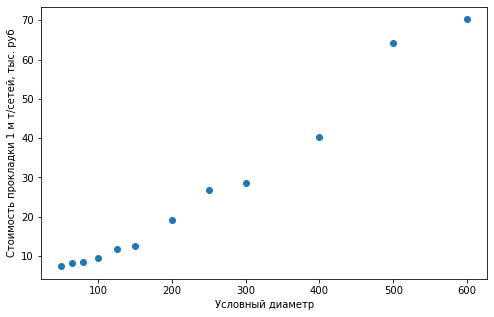

In [18]:
# Отобразим на графике стоимость прокладки трубопроводов, в зависмости от условного диаметра
x = price['DN'].values
y = price['cost_2020']

plt.figure(figsize=(8, 5))
plt.scatter(x, y)

plt.xlabel("Условный диаметр")
plt.ylabel("Стоимость прокладки 1 м т/сетей, тыс. руб");

По расположению точек на графике видно, что стоимость возрастает по квадратичной функции  вида:

$$y =\beta_0 + \beta_{1}x + \beta_{2}x^2$$

Определим коэффициенты $\beta_0$, $\beta_1$ и $\beta_2$

In [19]:
poly = PolynomialFeatures(degree=2, include_bias=False)

x_train = price[price['cost_2020'].notna()]['DN'].values
y_train = price[price['cost_2020'].notna()]['cost_2020']

In [20]:
poly_features_train = poly.fit_transform(x_train.reshape(-1, 1))

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features_train, y_train)

LinearRegression()

In [21]:
poly_features = poly.fit_transform(x.reshape(-1, 1))
y_predicted = poly_reg_model.predict(poly_features)

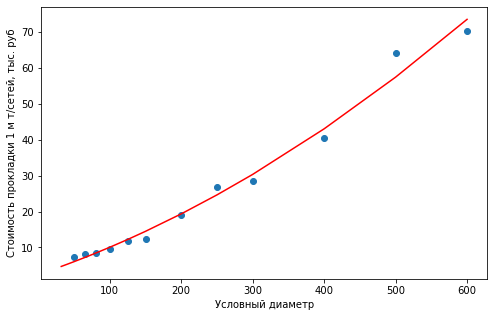

In [22]:
plt.figure(figsize=(8, 5))
plt.scatter(x, y)
plt.plot(x, y_predicted, c="red")

plt.xlabel("Условный диаметр")
plt.ylabel("Стоимость прокладки 1 м т/сетей, тыс. руб")

plt.show();

In [23]:
# Выведем получившуюся формулу
beta_0 = poly_reg_model.intercept_
beta_1, beta_2 = poly_reg_model.coef_

print(f'{beta_0:.2f} + {beta_1:.2f}*x + {beta_2:.2e}*x^2')

2.45 + 0.07*x + 8.49e-05*x^2


Таким образом, зависимость стоимости прокладки от условного диаметра трубопровода имеет вид:

$$y = 2.45 + 0.07x + 8.49 * 10^{-5}x^2$$

In [24]:
# Заполним отсутствующие значения стоимостей прокладки тепловых сетей
price.loc[price['DN'] == 32, ['cost_2020']] = y_predicted[0]
price.loc[price['DN'] == 40, ['cost_2020']] = y_predicted[1]

In [25]:
# Рассчитаем итоговую удельную стоимость строительства тепловой сети.
# Для этого определим все необходимые коэффициенты.

# Индексы-дефляторы
i_2020 = 1.0491
i_2021 = 1.0839

# НДС
k_vat = 1.2 

# Коэффициент перехода от цен Московской обл. к уровню цен Новосибирской обл.
k_conv = 0.93 

# Коэффициент, учитывающий изменение стоимости строительства
# на территории Новосибирской обл., связанный с климатическими условиями
k_climate = 1.02

# Коэффициент, учитывающий стесненные условия строительства
k_tight = 1.06

Индексы-дефляторы, используемые в расчете, показывают как изменились цены за счет инфляции. Они равны:
- за 2020 год: 104,91%;
- за 2021 год: 108,39%

источник: https://rosstat.gov.ru/storage/mediabank/ind_potreb_cen_05.html

In [26]:
price['cost_sp'] = (price['cost_2020'] * i_2020 * i_2021 * 
                    k_conv * k_climate * k_tight * k_vat)
price

DN  cost_2020    cost_sp
1    32   4.699561   6.448128
2    40   5.288421   7.256085
3    50   7.321600  10.045749
4    65   8.111300  11.129273
5    80   8.409500  11.538424
6   100   9.479500  13.006540
7   125  11.748300  16.119492
8   150  12.410100  17.027529
9   200  19.025600  26.104459
10  250  26.901400  36.910610
11  300  28.450400  39.035946
12  400  40.355200  55.370168
13  500  64.264100  88.174857
14  600  70.232700  96.364195

### Предобработка данных, перспективные площадки строительства

In [27]:
perspective_area = perspective_area[["Sys", 
                                     "Площадь кадастра _м2"]]
perspective_area = perspective_area.rename(columns={"Sys": "ID",
                                                    "Площадь кадастра _м2": "S"})

perspective_area

ID             S
0      22     673.29615
1      44   15759.36470
2      72    1532.11815
3      99    1081.23685
4     121   12433.31375
..    ...           ...
489  3616    4197.01815
490  3617   40316.98220
491  3618    1800.52290
492  3622  204231.43755
493  3623    2339.38080

[494 rows x 2 columns]

In [28]:
perspective_abonents = (perspective_abonents.groupby(['ID'])
                            .agg({'Нагрузка на отопление, Гкал/ч': 'sum',
                                  'Нагрузка на вентиляцию Гкал/ч': 'sum',
                                  'Нагрузка на ГВС средняя, Гкал/ч': 'sum',
                                  'Сумма при среднем ГВС, Гкал/ч': 'sum',
                                  'Годовое потребление тепловой энергии, Гкал': 'sum'})
                            .reset_index())

perspective_abonents['Qhv'] = (perspective_abonents['Нагрузка на отопление, Гкал/ч'] +
                               perspective_abonents['Нагрузка на вентиляцию Гкал/ч'])

perspective_abonents.rename(columns={'Нагрузка на ГВС средняя, Гкал/ч': 'Qhws', 
                                     'Сумма при среднем ГВС, Гкал/ч': 'Qsum',
                                     'Годовое потребление тепловой энергии, Гкал': 'Qyear'},
                            inplace=True)

perspective_abonents = perspective_abonents[['ID', 'Qhv', 'Qhws', 'Qsum', 'Qyear']]

perspective = perspective_area.merge(perspective_abonents, on=['ID'], how='left')

perspective['G'] = perspective['Qhv']*12.5 + perspective['Qhws']*21.9

perspective

ID             S        Qhv      Qhws       Qsum         Qyear  \
0      22     673.29615   1.290000  0.063532   1.353532   3347.702395   
1      44   15759.36470  10.525368  0.393794  10.919162  20748.413688   
2      72    1532.11815   0.642550  0.157947   0.800497   2823.692457   
3      99    1081.23685   0.321020  0.112748   0.433768   1614.484381   
4     121   12433.31375   0.820796  0.000000   0.820796   2059.380149   
..    ...           ...        ...       ...        ...           ...   
489  3616    4197.01815   1.004480  0.202972   1.207452   4100.093258   
490  3617   40316.98220   4.955400  0.110120   5.065520   8740.540715   
491  3618    1800.52290   0.979534  0.037000   1.016534   1989.814243   
492  3622  204231.43755   5.625600  0.200560   5.826160  10725.765760   
493  3623    2339.38080   0.266000  0.000000   0.266000    523.127258   

              G  
0     17.516351  
1    140.191189  
2     11.490914  
3      6.481931  
4     10.259950  
..          ...  
489   17.001087  
490   64.354128  
491   13.054475  
492   74.712264  
493    3.325000  

[494 rows x 7 columns]

### Предобработка данных, нормативы тепловых потерь

In [29]:
# среднегодовая температура теплоносителя в тепловых сетях
t_hc_mean = 68.2

# среднегодовая температура грунта
t_gr_mean = 5.8

# среднегодовая температура холодной воды на входе в систему теплоснабжения
t_cw_mean = (5328*5+3072*15)/8400 

In [30]:
heat_losses = heat_losses.rename(columns={"Разность температур теплоносителя и грунта, °С": 
                                          "dt"})
heat_losses = heat_losses[heat_losses['dt'] == round(t_hc_mean-t_gr_mean, 1)]
heat_losses = heat_losses.drop(columns=['dt']).transpose().reset_index()
heat_losses.columns = ['DN','dQ_is']
heat_losses = heat_losses[heat_losses['DN'] != 25]
heat_losses['d_int'] = heat_losses['DN']
heat_losses['d_int'].replace(dn_to_dint, inplace=True)
heat_losses['V'] = (2*np.pi*heat_losses['d_int']**2)/4 # объем
heat_losses = heat_losses[['DN', 'd_int', 'V', 'dQ_is']]
heat_losses['dQ_leak'] = heat_losses['V']*0.0025*(t_hc_mean-t_cw_mean)*1000
heat_losses['dQ'] = heat_losses['dQ_is']+heat_losses['dQ_leak']

heat_losses

DN  d_int         V    dQ_is     dQ_leak          dQ
1     32  0.033  0.001711   26.960    0.254635   27.214635
2     40  0.040  0.002513   28.960    0.374119   29.334119
3     50  0.050  0.003927   31.960    0.584561   32.544561
4     65  0.069  0.007479   37.744    1.113237   38.857237
5     80  0.082  0.010562   41.352    1.572234   42.924234
6    100  0.100  0.015708   45.136    2.338243   47.474243
7    125  0.125  0.024544   51.528    3.653504   55.181504
8    150  0.150  0.035343   57.528    5.261046   62.789046
9    200  0.207  0.067307   71.488   10.019135   81.507135
10   250  0.259  0.105371   83.704   15.685165   99.389165
11   300  0.309  0.149981   95.488   22.325774  117.813774
12   350  0.359  0.202446  106.880   30.135504  137.015504
13   400  0.408  0.261481  117.880   38.923320  156.803320
14   450  0.466  0.341108  128.664   50.776340  179.440340
15   500  0.515  0.416614  140.664   62.016038  202.680038
16   600  0.614  0.592184  162.624   88.150808  250.774808
17   700  0.702  0.774095  182.408  115.229527  297.637527
18   800  0.804  1.015388  204.584  151.147738  355.731738
19   900  0.902  1.278006  226.368  190.240348  416.608348
20  1000  1.000  1.570796  249.152  233.824253  482.976253
21  1200  1.192  2.231888  294.112  332.232464  626.344464
22  1400  1.392  3.043675  339.856  453.072838  792.928838

## Формирование датасета

In [31]:
# Добавим в базу участков стоимость их строительства
heat_net = heat_net.merge(price, on=['DN'], how='left')

heat_net

cadastre  length   Dint     DN  cost_2020    cost_sp
0      54:35:021070   17.34  0.150  150.0  12.410100  17.027529
1      54:35:021070   27.14  0.150  150.0  12.410100  17.027529
2      54:35:021070   22.14  0.150  150.0  12.410100  17.027529
3      54:35:021070   20.83  0.150  150.0  12.410100  17.027529
4      54:35:021070   23.57  0.150  150.0  12.410100  17.027529
...             ...     ...    ...    ...        ...        ...
14755  54:35:051930    5.45  0.082   80.0   8.409500  11.538424
14756  54:35:051135  302.40  0.125  125.0  11.748300  16.119492
14757  54:35:051135   20.20  0.050   50.0   7.321600  10.045749
14758  54:35:051135   50.10  0.069   65.0   8.111300  11.129273
14759  54:35:051905   56.00  0.040   40.0   5.288421   7.256085

[14760 rows x 6 columns]

In [32]:
heat_net['total_cost'] = heat_net['cost_sp'] * heat_net['length']

# Добавим в базу участков потери тепловой энергии в зависимости от условного диаметра
heat_net = heat_net.merge(heat_losses[['DN', 'dQ']], on=['DN'], how='left')
heat_net['dQ_year'] = heat_net['dQ']*heat_net['length']*8400/10**6

heat_net

cadastre  length   Dint     DN  cost_2020    cost_sp   total_cost  \
0      54:35:021070   17.34  0.150  150.0  12.410100  17.027529   295.257344   
1      54:35:021070   27.14  0.150  150.0  12.410100  17.027529   462.127124   
2      54:35:021070   22.14  0.150  150.0  12.410100  17.027529   376.989481   
3      54:35:021070   20.83  0.150  150.0  12.410100  17.027529   354.683419   
4      54:35:021070   23.57  0.150  150.0  12.410100  17.027529   401.338847   
...             ...     ...    ...    ...        ...        ...          ...   
14755  54:35:051930    5.45  0.082   80.0   8.409500  11.538424    62.884413   
14756  54:35:051135  302.40  0.125  125.0  11.748300  16.119492  4874.534514   
14757  54:35:051135   20.20  0.050   50.0   7.321600  10.045749   202.924135   
14758  54:35:051135   50.10  0.069   65.0   8.111300  11.129273   557.576582   
14759  54:35:051905   56.00  0.040   40.0   5.288421   7.256085   406.340770   

              dQ     dQ_year  
0      62.789046    9.145601  
1      62.789046   14.314395  
2      62.789046   11.677256  
3      62.789046   10.986325  
4      62.789046   12.431478  
...          ...         ...  
14755  42.924234    1.965071  
14756  55.181504  140.169849  
14757  32.544561    5.522161  
14758  38.857237   16.352680  
14759  29.334119   13.798769  

[14760 rows x 9 columns]

In [33]:
df_fit = (heat_net.groupby(['cadastre'])
                  .agg({'total_cost': 'sum',
                        'dQ_year': 'sum'})
                  .reset_index()
                  .merge(cadastre[['cadastre', 'S']], 
                         on=['cadastre'], 
                         how='left')
                  .merge(abonents,
                         on=['cadastre'], 
                         how='left'))

df_fit = df_fit[['cadastre', 
                 'S', 
                 'Qsum',
                 'total_cost',
                 'dQ_year']].dropna()

df_fit

cadastre             S       Qsum    total_cost     dQ_year
0    54:35:012510  7.094014e+04   2.439183  12017.018594  361.172765
1    54:35:012515  1.641355e+06  10.333105  23310.114753  712.835040
2    54:35:012516  1.864551e+04   0.208911    776.983344   25.451789
3    54:35:012520  5.671365e+05   2.028056   7508.190794  222.757469
4    54:35:012525  6.519932e+04   1.570300  11769.260652  345.116869
..            ...           ...        ...           ...         ...
699  54:35:101655  2.281321e+04   2.110334   5521.632273  140.239384
700  54:35:101660  1.805043e+04   1.738310   2353.772728   71.843089
701  54:35:101685  2.198707e+04   1.345215    377.316429   12.813143
702  54:35:101690  8.070169e+04   5.438473  15886.690987  458.427665
703  54:35:101695  2.759673e+04   4.155289   4046.146321  113.999767

[685 rows x 5 columns]

## Разведочный анализ

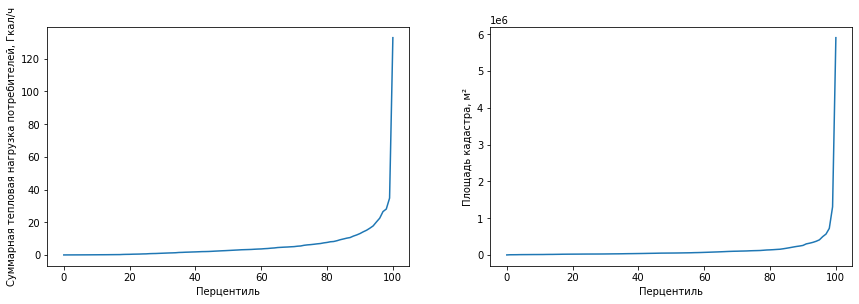

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))
fig.tight_layout(pad=5.0)

x, qsum, s = [], [], []
for i in range(101):
    x.append(i)
    qsum.append(df_fit.Qsum.quantile(i/100))
    s.append(df_fit.S.quantile(i/100))
    
axs[0].plot(x, qsum)
axs[0].set_xlabel("Перцентиль")
axs[0].set_ylabel("Суммарная тепловая нагрузка потребителей, Гкал/ч")
    
axs[1].plot(x, s)
axs[1].set_xlabel("Перцентиль")
axs[1].set_ylabel("Площадь кадастра, м²");

Из графика видно, что в исходных данных имеются выбросы по площади и тепловой нагрузке потребителей, которые значительно превышают медианные значения по городу

In [35]:
print(f'\
Тепловая нагрузка потребителей:\n\
    медиана           - {df_fit.Qsum.median():.3f} Гкал/ч\n\
    75-й перцентиль   - {df_fit.Qsum.quantile(0.75):.3f} Гкал/ч\n\
    90-й перцентиль   - {df_fit.Qsum.quantile(0.9):.3f} Гкал/ч\n\
    95-й перцентиль   - {df_fit.Qsum.quantile(0.95):.3f} Гкал/ч\n\
    максимум          - {df_fit.Qsum.max():.3f} Гкал/ч\n\
Площади кадастров:\n\
    медиана           - {df_fit.S.median()/1000:.1f} тыс. м²\n\
    75-й перцентиль   - {df_fit.S.quantile(0.75)/1000:.1f} тыс. м²\n\
    90-й перцентиль   - {df_fit.S.quantile(0.9)/1000:.1f} тыс. м²\n\
    95-й перцентиль   - {df_fit.S.quantile(0.95)/1000:.1f} тыс. м²\n\
    максимум          - {df_fit.S.max()/1000:.1f} тыс. м²')

Тепловая нагрузка потребителей:
    медиана           - 2.724 Гкал/ч
    75-й перцентиль   - 6.304 Гкал/ч
    90-й перцентиль   - 13.071 Гкал/ч
    95-й перцентиль   - 20.157 Гкал/ч
    максимум          - 132.834 Гкал/ч
Площади кадастров:
    медиана           - 54.0 тыс. м²
    75-й перцентиль   - 118.4 тыс. м²
    90-й перцентиль   - 261.0 тыс. м²
    95-й перцентиль   - 412.8 тыс. м²
    максимум          - 5905.4 тыс. м²


In [36]:
# Уберём из датасета выбросы по площади
df_fit = df_fit[(df_fit['S'] < df_fit.S.quantile(0.95)) &
                (df_fit['Qsum'] < df_fit.Qsum.quantile(0.95))]

### Визуализация

In [37]:
xq = df_fit.sort_values('Qsum')['Qsum'].values
yq = df_fit.sort_values('Qsum')['total_cost'].values

xs = df_fit.sort_values('S')['S'].values
ys = df_fit.sort_values('S')['total_cost'].values

In [38]:
def get_poly_pred(degree, y, x1, x2=None):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    if x2 is None:
        poly_features_x = poly_features.fit_transform(x1.reshape(-1, 1))
    else:
        poly_features_x = poly_features.fit_transform(x1.reshape(-1, 1),
                                                      x2.reshape(-1, 1))
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features_x, y)
    
    return poly_reg_model.predict(poly_features_x)

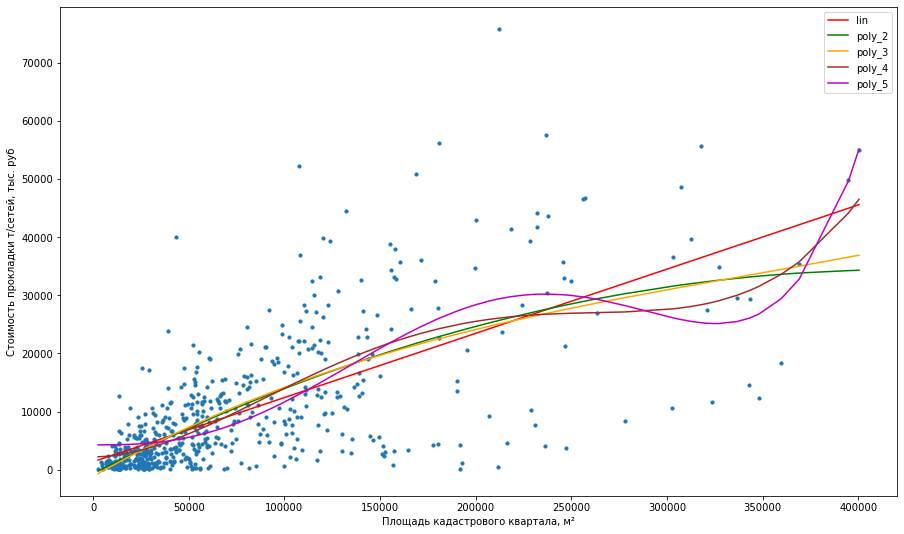

In [39]:
fig = plt.figure(figsize=(15, 9))

plt.scatter(xs, ys, s = 10)

zs = np.polyfit(xs, ys, 1)
ps = np.poly1d(zs)

plt.plot(xs, ps(xs), c="r", label='lin')
plt.plot(xs, get_poly_pred(2, ys, xs), c="g", label='poly_2')
plt.plot(xs, get_poly_pred(3, ys, xs), c="orange", label='poly_3')
plt.plot(xs, get_poly_pred(4, ys, xs), c="brown", label='poly_4')
plt.plot(xs, get_poly_pred(5, ys, xs), c="m", label='poly_5')

plt.xlabel("Площадь кадастрового квартала, м²")
plt.ylabel("Стоимость прокладки т/сетей, тыс. руб")

plt.legend()

plt.show()

Чем больше площадь кадастра, тем выше стоимость прокладки трубопроводов тепловых сетей в нём

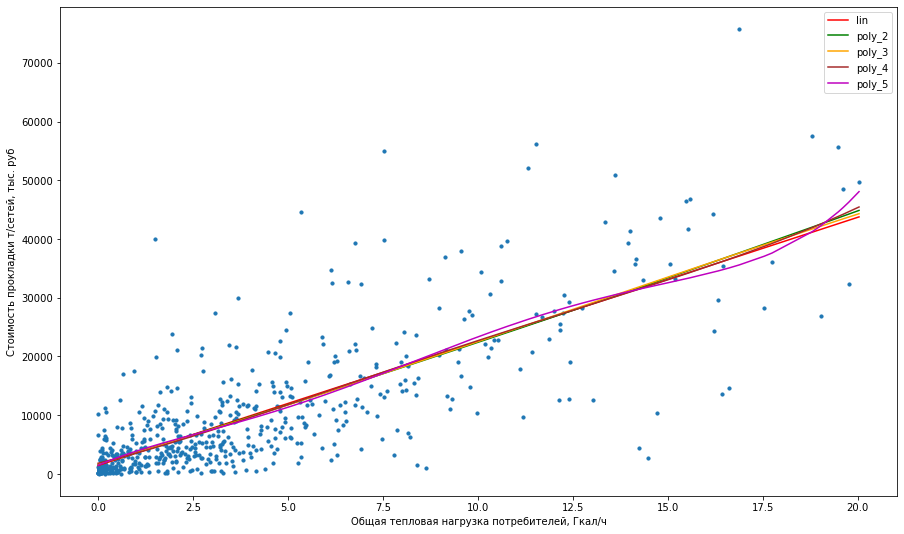

In [40]:
fig = plt.figure(figsize=(15, 9))

plt.scatter(xq, yq, s = 10)

zq = np.polyfit(xq, yq, 1)
pq = np.poly1d(zq)

plt.plot(xq, pq(xq), c="r", label='lin')
plt.plot(xq, get_poly_pred(2, yq, xq), c="g", label='poly_2')
plt.plot(xq, get_poly_pred(3, yq, xq), c="orange", label='poly_3')
plt.plot(xq, get_poly_pred(4, yq, xq), c="brown", label='poly_4')
plt.plot(xq, get_poly_pred(5, yq, xq), c="m", label='poly_5')

plt.xlabel("Общая тепловая нагрузка потребителей, Гкал/ч")
plt.ylabel("Стоимость прокладки т/сетей, тыс. руб")

plt.legend()

plt.show()

Чем выше общая тепловая нагрузка потребителей, находящихся в пределах одного кадастрового квартала, тем выше стоимость прокладки в нём трубопроводов тепловых сетей

## Определение точности предсказаний различных моделей

In [41]:
x_lin = df_fit[["S", "Qsum"]]

x_poly_q = df_fit['Qsum'].values
x_poly_s = df_fit['S'].values

y_cost = df_fit['total_cost']
y_dq = df_fit['dQ_year']

In [42]:
model_lin_cost = LinearRegression()
model_lin_cost.fit(x_lin, y_cost)

model_lin_dq = LinearRegression()
model_lin_dq.fit(x_lin, y_dq)

y_lin_cost_pred = model_lin_cost.predict(x_lin)
y_lin_dq_pred = model_lin_dq.predict(x_lin)

In [43]:
rmse_cost = [np.sqrt(mean_squared_error(y_cost, y_lin_cost_pred))]
diff_total_cost = df_fit['total_cost'].max() - df_fit['total_cost'].min()
rmse_cost_n = [rmse_cost[0]/diff_total_cost]

rmse_dq = [np.sqrt(mean_squared_error(y_dq, y_lin_dq_pred))]
diff_dq = df_fit['dQ_year'].max() - df_fit['dQ_year'].min()
rmse_dq_n = [rmse_dq[0]/diff_dq]

In [44]:
for i in range(2, 6):
    y_poly_cost_pred = get_poly_pred(i, y_cost, x_poly_q, x_poly_s)
    rmse_cost.append(np.sqrt(mean_squared_error(y_cost, y_poly_cost_pred)))
    rmse_cost_n.append(rmse_cost[-1]/diff_total_cost)
    y_poly_dq_pred = get_poly_pred(i, y_dq, x_poly_q, x_poly_s)
    rmse_dq.append(np.sqrt(mean_squared_error(y_dq, y_poly_dq_pred)))
    rmse_dq_n.append(rmse_dq[-1]/diff_dq)

In [45]:
rmse_cost.insert(0, "RMSE (total cost)")
rmse_cost_n.insert(0, "RMSE normilized (total cost)")
rmse_dq.insert(0, "RMSE (dQ year)")
rmse_dq_n.insert(0, "RMSE normilized (dQ year)")

In [46]:
columns_rmse = ['Metric',
                'Linear',
                'Polynomial_2',
                'Polynomial_3',
                'Polynomial_4',
                'Polynomial_5']

In [47]:
rmse = pd.DataFrame([rmse_cost, rmse_cost_n, rmse_dq, rmse_dq_n],
                    columns = columns_rmse)

rmse = rmse.set_index('Metric')

rmse[columns_rmse[1:]].style.highlight_min(color='lightgreen', axis=1)

Самая точная модель - линейная регрессия

### Визуализация множественной линейной регрессии

In [48]:
s, q_total = list(), list ()
for x in np.linspace(min(df_fit["S"]), max(df_fit["S"]), 100):
    for y in np.linspace(min(df_fit["Qsum"]), max(df_fit["Qsum"]), 100):
        s.append(x)
        q_total.append(y)
s = np.array(s).reshape(-1, 1)
q_total = np.array(q_total).reshape(-1, 1)
p = model_lin_cost.predict(np.concatenate([s, q_total], axis=1))

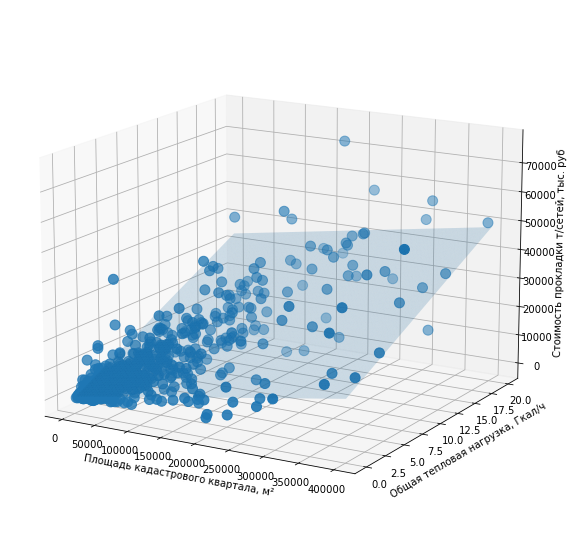

In [49]:
fig = plt.figure (figsize=(10, 10))
ax = plt.axes(projection="3d")

ax.scatter(df_fit["S"], 
           df_fit["Qsum"], 
           df_fit["total_cost"], s=100)

ax.plot_trisurf(s.ravel(), q_total.ravel(), p.ravel(), alpha=0.2)

ax.set_xlabel("Площадь кадастрового квартала, м²")
ax.set_ylabel("Общая тепловая нагрузка, Гкал/ч")
ax.set_zlabel("Стоимость прокладки т/сетей, тыс. руб")

ax.elev = 15

plt.show()

## Определение эффективного радиуса теплоснабжения

In [50]:
# Зададимся значением простого срока окупаемости, в зависимости от которого будет
# рассчитан эффективный радиус теплоснабжения
pp=5

In [51]:
# Определение диаметра нового ответвления в зависимости от расхода сетевой воды
def get_dn_branch(g):
    if g <= 1.7:
        return 40
    elif g <= 3:
        return 50    
    elif g <= 6.5:
        return 65       
    elif g <= 11:
        return 80 
    elif g <= 18:
        return 100
    elif g <= 32:
        return 125   
    elif g <= 58:
        return 150
    elif g <= 125:
        return 200
    elif g <= 215:
        return 250
    elif g <= 350:
        return 300
    elif g <= 520:
        return 350
    else:
        return 400

In [52]:
# Обучение
model_lin_cost.fit(x_lin, y_cost)
model_lin_dq.fit(x_lin, y_dq)

LinearRegression()

In [53]:
X_predict = perspective[["S", "Qsum"]]

# Ожидаемая стоимость строительства внутриквартальных тепловых сетей
perspective['cost_predict'] = model_lin_cost.predict(X_predict)

# Ожидаемые годовые потери во внутриквартальных тепловых сетях
perspective['dQ_year_predict'] = model_lin_dq.predict(X_predict)

# Диаметр нового ответвления для подключения перспективной застройки
perspective['DN_branch'] = perspective.apply(lambda x: get_dn_branch(x.G), axis=1)

# Количество трубопроводов
perspective['n_pipes'] = np.where(perspective['DN_branch']>=300, 3, 2)

# Коэффициент, учитывающий прокладку трубопроводов в три нитки
perspective['K_res'] = np.where(perspective['n_pipes']==3, 1.39, 1)

# Удельные тепловые потери нового ответвления
perspective = pd.merge(perspective, 
                       heat_losses[['DN', 'dQ']], 
                       left_on='DN_branch', 
                       right_on='DN')

# Удельная стоимость строительства нового ответвления
perspective = pd.merge(perspective, 
                       price[['DN', 'cost_sp']],
                       on='DN')

perspective = perspective.drop(columns=['DN'])

# Эффективный радиус теплоснабжения
perspective['r_ef'] = ((perspective['Qyear']*T_ABONENTS*pp - 
                        perspective['Qyear']*T_SOURCE*pp - 
                        perspective['dQ_year_predict']*T_SOURCE*pp - 
                        perspective['cost_predict']*1000) / 
                       (perspective['cost_sp']*perspective['K_res']*1000 +
                        8400*perspective['dQ']*1.15*perspective['n_pipes']/2*T_SOURCE*pp/10**6))

perspective

ID            S        Qhv      Qhws       Qsum         Qyear  \
0      22    673.29615   1.290000  0.063532   1.353532   3347.702395   
1      72   1532.11815   0.642550  0.157947   0.800497   2823.692457   
2     178    723.82265   0.816967  0.135323   0.952290   3015.184609   
3     464   2638.08945   1.020630  0.135300   1.155930   3543.715156   
4     519    561.91655   1.127760  0.036000   1.163760   2122.158761   
..    ...          ...        ...       ...        ...           ...   
489  2929     43.14065   0.003000  0.000000   0.003000      7.823747   
490  3297   1334.33175   0.107000  0.005000   0.112000    234.681687   
491  3298    510.12645   0.040000  0.007644   0.047644    133.660510   
492  3382    253.85375   0.049480  0.001260   0.050740    128.072496   
493  3209  83752.68760  16.947865  2.458145  19.406010  59423.373534   

              G  cost_predict  dQ_year_predict  DN_branch  n_pipes  K_res  \
0     17.516351   2689.487276        80.023549        100        2   1.00   
1     11.490914   1813.801165        54.677672        100        2   1.00   
2     13.175661   2032.521154        61.040417        100        2   1.00   
3     15.720945   2439.237616        72.687345        100        2   1.00   
4     14.885400   2373.656836        70.904919        100        2   1.00   
..          ...           ...              ...        ...      ...    ...   
489    0.037500    447.986265        15.298446         40        2   1.00   
490    1.447000    675.755478        21.809104         40        2   1.00   
491    0.667404    538.938522        17.900895         40        2   1.00   
492    0.646094    534.340382        17.781908         40        2   1.00   
493  265.681688  35472.020973      1022.650892        300        3   1.39   

             dQ    cost_sp         r_ef  
0     47.474243  13.006540   892.569010  
1     47.474243  13.006540   787.178244  
2     47.474243  13.006540   833.345790  
3     47.474243  13.006540   975.709997  
4     47.474243  13.006540   515.072462  
..          ...        ...          ...  
489   29.334119   7.256085   -56.416312  
490   29.334119   7.256085    44.921537  
491   29.334119   7.256085     4.540903  
492   29.334119   7.256085     1.904561  
493  117.813774  39.035946  4062.118089  

[494 rows x 15 columns]

## Визуализация

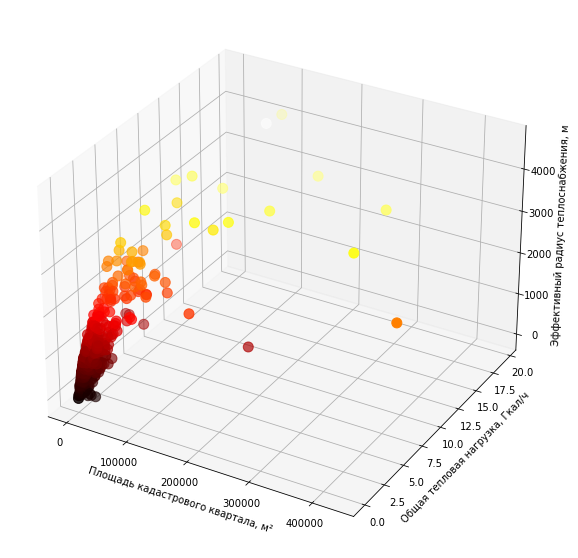

In [54]:
fig = plt.figure (figsize=(10, 10))
ax = plt.axes(projection="3d")

ax.scatter(perspective["S"], 
           perspective["Qsum"], 
           perspective["r_ef"], s=100, 
           c=perspective.r_ef,
           cmap='hot')

ax.set_xlabel("Площадь кадастрового квартала, м²")
ax.set_ylabel("Общая тепловая нагрузка, Гкал/ч")
ax.set_zlabel("Эффективный радиус теплоснабжения, м")

plt.show()

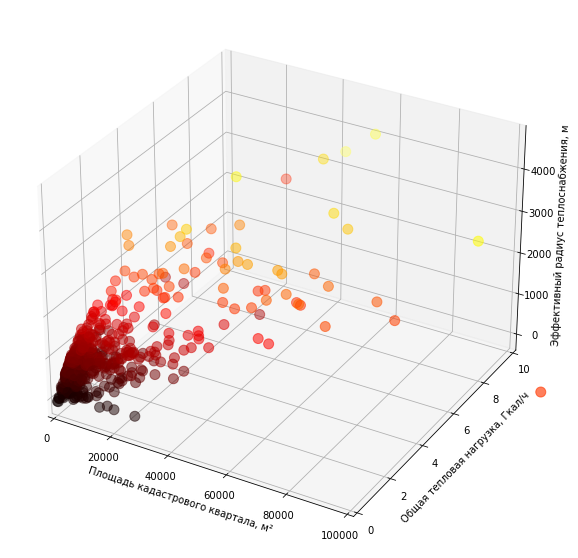

In [55]:
fig = plt.figure (figsize=(10, 10))
ax = plt.axes(projection="3d")

ax.set_xlim(0, 100000)
ax.set_ylim(0, 10)

ax.scatter(perspective["S"], 
           perspective["Qsum"], 
           perspective["r_ef"], s=100, 
           c=perspective.r_ef,
           cmap='hot')

ax.set_xlabel("Площадь кадастрового квартала, м²")
ax.set_ylabel("Общая тепловая нагрузка, Гкал/ч")
ax.set_zlabel("Эффективный радиус теплоснабжения, м")

plt.show()